In [1]:
import os
from collections import defaultdict
import pickle

import numpy as np
import matplotlib.pyplot as plt

from utils.parse_logs import parse_metrics

In [173]:
import os
from collections import defaultdict

import numpy as np
import matplotlib.pyplot as plt

from utils.parse_logs import parse_metrics

DATASET = 'PTC'
METRIC = 'F1 Score'
GNNs = ('GCN',)

DEPTHS = range(2, 6)
Ps = np.round(np.arange(0.1, 1, 0.1), decimals=1)

PAR_DIR = f'./results/drop-edge/long-range/{DATASET}'

train_accs = defaultdict(list)
es_test_accs = defaultdict(list)

for gnn in GNNs:
    for depth in DEPTHS:
        for p in Ps:
            exp_dir = f'{PAR_DIR}/{gnn}/L={depth}/P={p}'
            for sample_dir in os.listdir(exp_dir):
                train, val, test = parse_metrics(f'{exp_dir}/{sample_dir}/logs')
                # if max(train[METRIC]) < 0.2:
                #     continue
                train_accs[(gnn, depth, p)].append(max(train[METRIC]))
                es_test_accs[(gnn, depth, p)].append(test[METRIC][np.argmax(val[METRIC])])

train_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in train_accs.items()}
es_test_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in es_test_accs.items()}

fig, axs = plt.subplots(1, len(GNNs), figsize=(6*len(GNNs), 4))
if not hasattr(axs, '__len__'): axs = (axs,)

for gnn, ax in zip(GNNs, axs):
    for depth in DEPTHS:
        lower = ([train_accs[(gnn, depth, drop_p)][0]-train_accs[(gnn, depth, drop_p)][1] for drop_p in Ps])
        mean = ([train_accs[(gnn, depth, drop_p)][0] for drop_p in Ps])
        upper = ([train_accs[(gnn, depth, drop_p)][0]+train_accs[(gnn, depth, drop_p)][1] for drop_p in Ps])
        ax.plot(Ps, mean, label=depth)
        ax.fill_between(Ps, lower, upper, alpha=0.2)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel(f'Training {METRIC}')
    ax.set_title(gnn)
    # ax.set_ylim((0.92, 1.0))
    ax.legend()
    ax.grid()

fig.tight_layout()
fn = f'./assets/short-range/{DATASET}/train_{METRIC.lower().replace(" ", "-")}.png'
os.makedirs(os.path.dirname(fn), exist_ok=True)
plt.savefig(fn)

In [174]:
train_accs = defaultdict(list)
es_test_accs = defaultdict(list)

for gnn in GNNs:
    for depth in DEPTHS:
        for p in Ps:
            exp_dir = f'{PAR_DIR}/{gnn}/L={depth}/P={p}'
            for sample_dir in os.listdir(exp_dir):
                train, val, test = parse_metrics(f'{exp_dir}/{sample_dir}/logs')
                # if max(train[METRIC]) < 0.2:
                #     continue
                train_accs[(gnn, depth, p)].append(max(train[METRIC]))
                es_test_accs[(gnn, depth, p)].append(test[METRIC][np.argmax(val[METRIC])])

train_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in train_accs.items()}
es_test_accs = {exp: (np.mean(samples), np.std(samples)) for exp, samples in es_test_accs.items()}



In [175]:
# for gnn, color in zip(GNNs, ('blue', 'green')):
#     best_probs = list()
#     for depth in DEPTHS:
#         best_probs.append(Ps[np.argmax([es_test_accs[(gnn, depth, p)][0] for p in Ps])])
#     plt.plot(DEPTHS, best_probs, color=color, label=gnn)

# plt.xlabel('Depth')
# plt.ylabel('Best DropEdge Probability')
# plt.legend()
# plt.grid()
# plt.show()

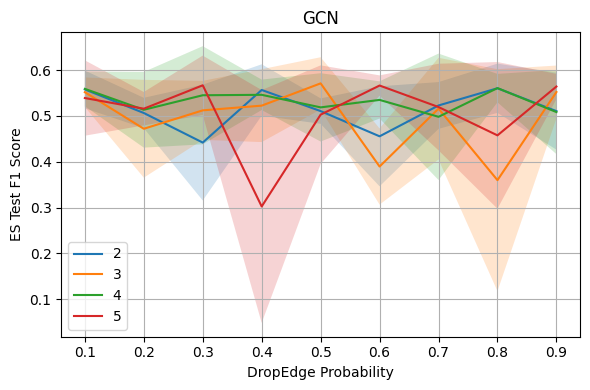

In [176]:
fig, axs = plt.subplots(1, len(GNNs), figsize=(6*len(GNNs), 4))
if not hasattr(axs, '__len__'): axs = (axs,)

for gnn, ax in zip(GNNs, axs):
    for depth in DEPTHS:
        lower = ([es_test_accs[(gnn, depth, drop_p)][0]-es_test_accs[(gnn, depth, drop_p)][1] for drop_p in Ps])
        mean = ([es_test_accs[(gnn, depth, drop_p)][0] for drop_p in Ps])
        upper = ([es_test_accs[(gnn, depth, drop_p)][0]+es_test_accs[(gnn, depth, drop_p)][1] for drop_p in Ps])
        ax.plot(Ps, mean, label=depth)
        ax.fill_between(Ps, lower, upper, alpha=0.2)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel(f'ES Test {METRIC}')
    ax.set_title(gnn)
    ax.legend()
    ax.grid()

fig.tight_layout()
fn = f'./assets/long-range/{DATASET}/es-test_{METRIC.lower().replace(" ", "-")}.png'
os.makedirs(os.path.dirname(fn), exist_ok=True)
plt.savefig(fn)
plt.show()

In [177]:
# for gnn, color in zip(GNNs, ('blue', 'green')):
#     best_probs = list()
#     for depth in DEPTHS:
#         best_probs.append(Ps[np.argmax([train_accs[(gnn, depth, drop_p)][0] for drop_p in Ps])])
#     plt.plot(DEPTHS, best_probs, color=color, label=gnn)

# plt.legend()
# plt.grid()
# plt.show()

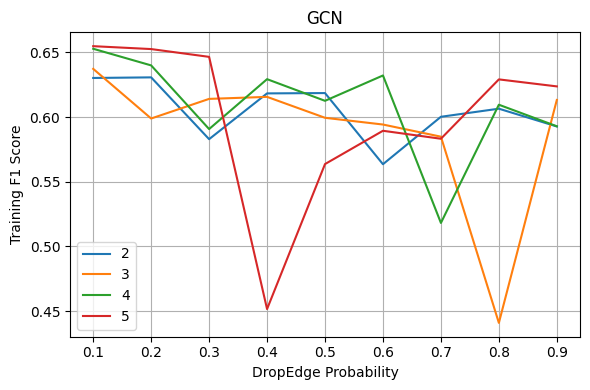

In [180]:
fig, axs = plt.subplots(1, len(GNNs), figsize=(6*len(GNNs), 4))
if not hasattr(axs, '__len__'): axs = (axs,)

for gnn, ax in zip(GNNs, axs):
    for depth in DEPTHS:
        lower = ([train_accs[(gnn, depth, drop_p)][0]-train_accs[(gnn, depth, drop_p)][1] for drop_p in Ps])
        mean = ([train_accs[(gnn, depth, drop_p)][0] for drop_p in Ps])
        upper = ([train_accs[(gnn, depth, drop_p)][0]+train_accs[(gnn, depth, drop_p)][1] for drop_p in Ps])
        ax.plot(Ps, mean, label=depth)
        # ax.fill_between(Ps, lower, upper, alpha=0.2)
    ax.set_xlabel('DropEdge Probability')
    ax.set_ylabel(f'Training {METRIC}')
    ax.set_title(gnn)
    # ax.set_ylim((0.92, 1.0))
    ax.legend()
    ax.grid()

fig.tight_layout()
fn = f'./assets/short-range/{DATASET}/train_{METRIC.lower().replace(" ", "-")}.png'
os.makedirs(os.path.dirname(fn), exist_ok=True)
plt.savefig(fn)
plt.show()

In [179]:
# fig, axs = plt.subplots(1, len(GNNs), figsize=(6*len(GNNs), 4))
# if not hasattr(axs, '__len__'): axs = (axs,)

# for gnn, ax in zip(GNNs, axs):
#     plotted = set()
#     for exp_dir in os.listdir(PAR_DIR):
#         with open(f'{PAR_DIR}/{exp_dir}/config.pkl', 'rb') as f:
#             config = pickle.load(f)
#         depth = len(config.gnn_layer_sizes)
#         if config.dataset == DATASET and config.gnn in GNNs and config.dropout == 'DropEdge' and config.drop_p == 0.9 and depth not in plotted:
#             train, val, test = parse_metrics(f'{PAR_DIR}/{exp_dir}/logs')
#             ax.plot(train['Epoch'], train[METRIC], label=depth)
#             plotted.add(depth)
#     ax.set_xlabel('Epoch')
#     ax.set_ylabel(f'Training {METRIC}')
#     ax.set_title(gnn)
#     ax.grid()
#     ax.legend()

# fig.tight_layout()
# plt.show()